<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# Импорт библиотеки pandas
import pandas as pd

In [2]:
df = pd.read_csv('D:/Project/3/real_estate_data.csv')

In [3]:
# Получим общую информацию о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Из полученной информации видим, что данные все находятся в одной колонке. Необходимо их разделить

In [4]:
# Для разделения колонок применим параметр `sep`
df = pd.read_csv('D:/Project/3/real_estate_data.csv', sep = '\t')

In [5]:
# Выведем обработанную информацию о таблице на экран
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в нашей таблице 22 колонки. Из них, 2 колонки имеют логический тип данных, 14 колонок - вещественные числа,
3 колонки - целые числа, 3 колонки - строки.

Согласно документации к данным:
    
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

In [6]:
# Выведем первые 5 строк нашей таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
# Выведем название колонок
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Как видим, название колонок написаны правильно, не начинаются с заглавных букв и пробелов,
присутствует "змеиный регистр".

### Вывод

Предварительно можно утвердать, что данных достаточно для установления параметров с целью построения автоматизированной системы. Однако, встречаются пропуски в данных. Кроме того, возможно, придется поменять тип данных некоторых столбцов

## Предобработка данных

Сначала посчитаем, сколько пропущенных значений в таблице

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как видим, в 14 столбцах имеются пропущенные значения. Но не все они будут влиять на исследование.
Рассмотрим их более внимательно и при необходимости заменим

Рассмотрим столбы `balcony`, `parks_around3000`, `ponds_around3000`. 
Будем считать, что если значение в этих столбцах пропущено, то оно равно 0, так как в квартире нет балкона,
а в радиусе трех километров нет ни парка, ни водоема.

In [9]:
# Заменим пропущенные значения в эти столбцах на 0 методом `.fillna()`
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [10]:
# Поменяем тип столбцов с вещественные числа на целые числа
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000   

Заполним пропуски в столбце `floors_total`. 

In [12]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [13]:
df[df['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Скорее всего, в представленных таблицах видно, что если стоит пропуск в графе `floors_total`, то значит, что указанный в объявлении этаж - это последний. Поэтому заменим пропуски в графе `floors_total` указанным в объявлении этажем

In [14]:
# Для заполнения пропусков заполним пропуски нулем и создадим функцию, в которой определим, 
# что если всего этажей в доме равно 0, то функция будет возвращать этаж.
df['floors_total'] = df['floors_total'].fillna(0)
def floors(row):
    if row['floors_total'] == 0:
        row['floors_total'] = row['floor']
    return row

df = df.apply(floors, axis=1)

df['floors_total'].isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000   

Рассмотрим столбец `is_apartment`. 

In [16]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Значения могут говорить, что если не указаны данные, то квартира не является аппартаментами. Заменим пропуски на `False`,
что значит, не аппартаменты

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [18]:
df['is_apartment'].isna().sum()

0

Рассмотрим пропуски в столбцах `living_area` и `kitchen_area`. 

In [19]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.671463,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.595802,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В связи с малым количеством пропущенных значений в данных столбцах, пропуски можно заменить средним значением (`mean`)

In [20]:
# Рассчитаем значение жилой площади от среднего отношения жилой площади к средней общей площади квартиры 
mean_live = df['living_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(mean_live * df['total_area'], inplace=True)

In [21]:
# Рассчитаем значение площади кухни от среднего отношения площади кухни к средней общей площади квартиры 
mean_kitchen = df['kitchen_area'].mean() / df['total_area'].mean()
df['kitchen_area'].fillna(mean_kitchen * df['total_area'], inplace=True)

Пропуски в `ceiling_height` (высота потолков) заменим средним значением. Оно примерно совпадает со значением по СНИПам (2,5)

In [22]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

Рассмотрим столбцы `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`.

In [23]:
# Сгруппируем расстояние до аэропорта по колонке "Название населенного пункта" и методом `transform()` найдем среднее
# значение. После чего заполним пропуски по населенному пункту, а оставшиеся пропуски заполним средним значением
grouped_nearest=df.groupby('locality_name')['airports_nearest'].transform('mean')
df['airports_nearest'].fillna(grouped_nearest,inplace=True)
df['airports_nearest']=df['airports_nearest'].fillna(df['airports_nearest'].mean())
df['airports_nearest'].isna().sum()

0

In [24]:
# Аналогично расстоянию до аэропорта сгруппируем "Расстояние" до центра города
grouped_nearest=df.groupby('locality_name')['cityCenters_nearest'].transform('mean')
df['cityCenters_nearest'].fillna(grouped_nearest,inplace=True)
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean())
df['cityCenters_nearest'].isna().sum()

0

In [25]:
# Расстояние для парка и водоема сгруппировать по среднему значению нельзя, так как поблизости от квартиры они могут
#  совсем не находиться. Поэтому заменим пропущенние значения на "unknown"
df['parks_nearest'] = df['parks_nearest'].fillna('unknown')
df['ponds_nearest'] = df['ponds_nearest'].fillna('unknown')

df['parks_nearest'].isna().sum()
df['ponds_nearest'].isna().sum()

0

Рассмотрим столбец `days_exposition` (сколько дней было размещено объявление). Так как в аннотации сказано, что перед
нами данные о продажах квартир за несколько лет, то вряд ли можно утверждать, что если значение отсутствует, то
квартира еще продается. Логичнее заполнить пропуски медианным значением.

In [26]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

In [27]:
df['days_exposition'].isna().sum()

0

Рассмотрим столбец `locality_name`

In [28]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

При изучении столбца видим, что в нем присутствуют неявные дубликаты: есть "посёлок", а есть "поселок". Приведем к одному виду - "поселок".

In [29]:
# заменим букву "ё" на "е" методом `re`
import re
for i in df.loc[(df['locality_name'].isna()==False),'locality_name'].index:    
    new_letter = df.loc[i, 'locality_name']
    if 'ё' in new_letter:
        new_letter = re.sub('ё', 'е', new_letter)
    df.loc[i, 'locality_name'] = new_letter

In [30]:
df['locality_name']

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

Еще раз проверим типы данных и заменим при необходимости

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null object
ponds_around3000    

In [32]:
# Заменим "Общее число этажей" и "Балконы" на целочисленный тип, т.к. не может быть 1,5 этажа или балкона
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

In [33]:
# У "Даты публикации" поменяем тип на `datetime`
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null object
ponds_around30

Изучим столбец "Цена на момент снятия с публикации"

In [35]:
df['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

Видим, что имеются аномалии: слишком низкое значение (12190) и слишком высокое (763 млн). 

In [36]:
# Рассмотрим квартиру с низким значением
df.iloc[8793]

total_images                              7
last_price                            12190
total_area                              109
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                             25
living_area                              32
floor                                    25
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                      36421
cityCenters_nearest                    9176
parks_around3000                          1
parks_nearest                           805
ponds_around3000                          0
ponds_nearest                       unknown
days_exposition                           8
Name: 8793, dtype: object

Видим, что это двухкомнатная квартира в Санкт-Петербурге в 25-этажном доме на последнем этаже. Цена выглядит очень
подозрительно. Заменим ее на минимальное значение столбца "Цена на момент снятия с публикации". Возможно, при продаже
данной квартиры могут быть какие-либо мошеннические действия

In [37]:
# Заменим число `12190` на ближайшее минимальное значение
df['last_price'] = df['last_price'].replace(12190, 430000)

In [38]:
# Рассмотрим квартиру с высоким значением
df.iloc[12971]

total_images                             19
last_price                         7.63e+08
total_area                              400
first_day_exposition    2017-09-30 00:00:00
rooms                                     7
ceiling_height                       2.7715
floors_total                             10
living_area                             250
floor                                    10
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                        70.0583
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                      25108
cityCenters_nearest                    3956
parks_around3000                          1
parks_nearest                           530
ponds_around3000                          3
ponds_nearest                           756
days_exposition                          33
Name: 12971, dtype: object

Тут ничего менять не будем, так как вполне возможно, что 7-комнатная квартира рядом с парком и прудом общей площадью
400 квадратных метров действительно стоит 763 млн.

Рассмотрим столбец "Комнаты". Заменим аномальные значения комнат

In [39]:
# Заменим значение 0 комнат на минимальное значение 1 комната
df['rooms'] = df['rooms'].replace(0,1)

In [40]:
df['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

Также видим, что присутствуют 8- и 19-комнатные квартиры. К сожалению, заменить их не представляется возможным, т.к.
непонятно, на что их менять. В дальнейшем, при построении гистограммы, будем считать это выбросом

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу столбец с ценой квадратного метра. Квадратный метр вычисляется как отношение цены к общей площади

In [41]:
# Квадратный метр = цена / общую площадь
df['price_square_meter'] = df['last_price']/df['total_area']

Добавим в таблицу столбцы с днем недели, месяцем и годом публикации объявления

In [42]:
# Воспользуемся методом df.weekday()
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Обратим внимание, что 0 - это понедельник, 1 - вторник ... 6 - воскресенье

Добавим в таблицу столбцы с этажностью квартиры

In [43]:
# Сделаем функцию, которая возвращает этажность
def floor(floor_name):
    if floor_name['floor'] == 1:
        return 'первый'
    elif floor_name['floor'] == floor_name['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['category_floor'] = df.apply(floor, axis = 1)

In [44]:
# Проверим результаты добавления квадратного метра, дня недели/месяца/года, этажности
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,category_floor
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,...,1,482,2,755,95.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,False,...,0,unknown,0,unknown,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,False,...,1,90,2,574,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,90.785766,9,False,...,2,84,3,234,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,...,2,112,1,48,121.0,100000.000000,1,6,2018,другой


Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

In [45]:
# Рассчитаем по формуле: жилая площадь / общая площадь;
# Площадь кухни / общая площадь
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [46]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,category_floor,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,...,2,755,95.0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.600000,1,False,...,0,unknown,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.300000,4,False,...,2,574,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,90.785766,9,False,...,3,234,424.0,408176.100629,4,7,2015,другой,0.570980,0.175146
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,...,1,48,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


Сделаем выводы: расчеты произведены, данные добавлены в новые столбцы. Пора приступать к исследовательскому анализу данных

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для наглядности для каждого параметра
построим гистограмму (т.е. график, который покажет, как часто в наборе данных встречается то или иное значение)

In [47]:
# Подключим библиотеку 
import matplotlib.pyplot as plt

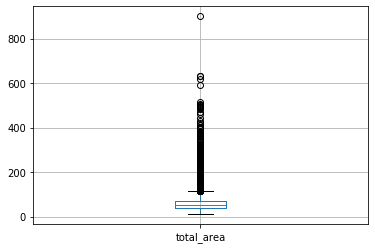

In [48]:
# Построим диаграмму размаха с целью визуально оценить характеристики распределения
df.boxplot('total_area')

Text(0, 0.5, 'Количество квартир')

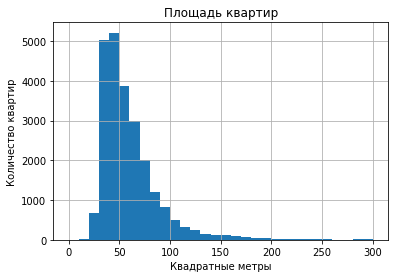

In [49]:
# Строим гистограмму для площади квартиры
df['total_area'].hist(bins=30, range = (0,300))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Из представленной гистограммы видим, что самые распространненные квартиры на рынке недвижимости - это квартиры площадью
40-50 квадратных метров

Text(0, 0.5, 'Количество квартир')

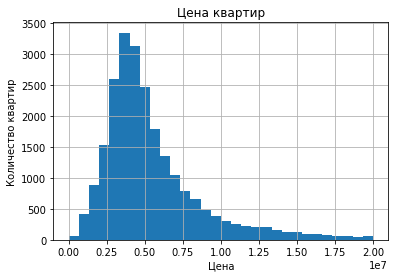

In [50]:
# Строим гистограмму для цены
df['last_price'].hist(bins=30, range = (0,20000000))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

Из представленного графика видим, что цены на квартиры в основном от 2,5 до 5 млн рублей

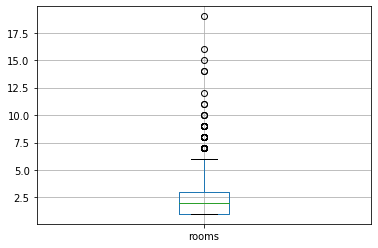

In [51]:
# Построим диаграмму размаха с целью визуально оценить характеристики распределения
df.boxplot('rooms')

Text(0, 0.5, 'Количество квартир')

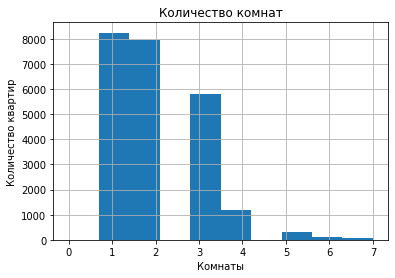

In [52]:
# Строим гистограмму для числа комнат
df['rooms'].hist(bins=10, range = (0,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')

Из представленного графика видим, что в основном продаются 1- и 2-комнатные квартиры

Text(0, 0.5, 'Количество квартир')

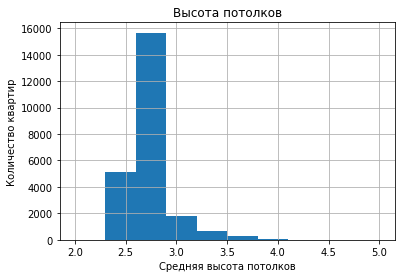

In [53]:
# Строим гистограмму для высоты потолков
df['ceiling_height'].hist(bins=10, range = (2,5))
plt.title('Высота потолков')
plt.xlabel('Средняя высота потолков')
plt.ylabel('Количество квартир')

Видим, что средняя высота потолков 2,7 метра. Что, в принципе, соответствует СНИПам.

Изучим количество дней, которые ушли на продажу квартиры.

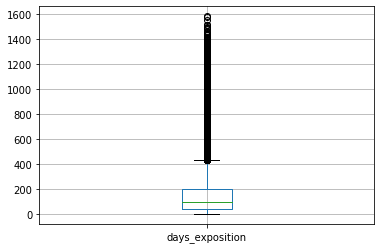

In [54]:
# Построим диаграмму размаха с целью визуально оценить характеристики распределения
df.boxplot('days_exposition')

В размах "усов" попали нормальные значения, а за пределами - выбросы

Text(0, 0.5, 'Количество квартир')

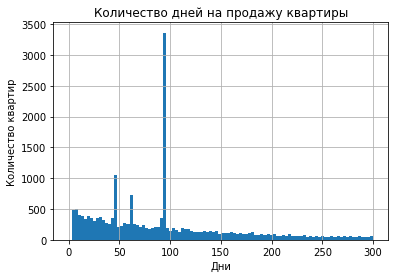

In [55]:
# Строим гистограмму для времени, потраченному на продажу квартиры
df['days_exposition'].hist(bins=100, range = (0,300))
plt.title('Количество дней на продажу квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')

In [56]:
df['days_exposition'].median()

95.0

In [57]:
df['days_exposition'].mean()

169.36022616988058

In [58]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что медиана составляет 95 дней. Т.е. именно дней столько в среднем уходит на продажу квартиры. Также видим, что
быстрым временем продажи квартиры является 45 дней и меньше. Если квартира не продалась раньше 200 дней, то
считается, что продажа идет долго.

Подведем промежуточный итог и ответим на вопрос: какие редкие и выбивающие значения мы убрали? Какие особенности мы
обнаружили?
- При изучении поступившего файла данные были в одной колонке. Мы разделили данные на 22 колонки, которые впоследствие привели к соответствующему типу;
- Поставили 0 в пропущенных данных в столбцах: "Балконы", "Число водоемов в радиусе 3 км", "Число парков в радиусе 3 км";
- Заменили пропуски в этажности дома;
- Поменяли число комнат 0 на минимальное значение 1;
- Обнаружили неправдоподобно низкую цену на квартиру и заменили ее на минимальную. Но отметили для себя, что цена подозрительная

Особенности:
- самые распространненные квартиры на рынке недвижимости - это квартиры площадью 40-50 квадратных метров;
- цены на квартиры в основном от 2,5 до 5 млн рублей;
- в основном продаются 1- и 2-комнатные квартиры;
- средняя высота потолков 2,7 метра;
- среднее время продажи составляет 95 дней

Изучим столбы `total_area`, `ceiling_height`, `rooms`, `days_exposition`: проверим есть ли в них выбросы.

In [59]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видим, что в целом значения нормальные, но присутсвуют выбросы (вряд ли есть площадь квартиры 900 кв. метров)

In [60]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

Выброс в высоте потолков - 100 метров

In [61]:
df['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [62]:
df['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

Также существуют выбросы (число комнат от 8 до 19)

In [63]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
df['days_exposition'].value_counts()

95.0      3245
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1110.0       1
1135.0       1
951.0        1
693.0        1
773.0        1
Name: days_exposition, Length: 1141, dtype: int64

Есть объявления длительностью более 1000 дней, это больше 3-х лет.

Избавимся от выбросов методом `query()` и подсчитаем процент удаленных объявлений

In [65]:
df = df.query('15 <= total_area <=150')

In [66]:
df = df.query('1.7 <= ceiling_height <= 3.0')

In [67]:
df = df.query('1 <= rooms <= 7')

In [68]:
df = df.query('1<= days_exposition <= 450')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 23698
Data columns (total 29 columns):
total_images            19997 non-null int64
last_price              19997 non-null float64
total_area              19997 non-null float64
first_day_exposition    19997 non-null datetime64[ns]
rooms                   19997 non-null int64
ceiling_height          19997 non-null float64
floors_total            19997 non-null int64
living_area             19997 non-null float64
floor                   19997 non-null int64
is_apartment            19997 non-null bool
studio                  19997 non-null bool
open_plan               19997 non-null bool
kitchen_area            19997 non-null float64
balcony                 19997 non-null int64
locality_name           19962 non-null object
airports_nearest        19997 non-null float64
cityCenters_nearest     19997 non-null float64
parks_around3000        19997 non-null int64
parks_nearest           19997 non-null object
ponds_around30

In [70]:
1-(19997/23698)

0.1561735167524686

Получилось, что примерно 15% объявлений содержали аномальные значения (выбросы), т.е. примерно каждое шестое. Удалив их, можем построить гистограммы и изучить данные. Считаю, что удалив 15% объявлений, все равно осталось достаточное количество данных для анализа и это не повлияет на итоговый результат

(0, 150)

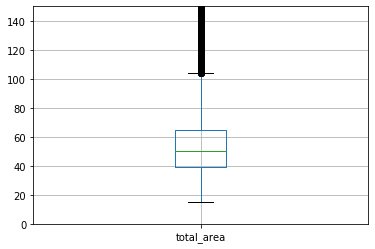

In [71]:
# Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси столбца "Общая площадь"
df.boxplot('total_area')
plt.ylim(0, 150)

Text(0, 0.5, 'Количество квартир')

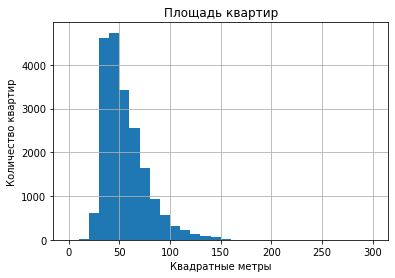

In [72]:
# Строим гистограмму для площади квартиры
df['total_area'].hist(bins=30, range = (0,300))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

В размах «усов» на первом графике попали нормальные значения. Сравнивая с гистограммой, можно сделать вывод, что данные совпадают: самые распространненные квартиры на рынке недвижимости - это квартиры площадью 40-50 квадратных метров. В основном продаются квартиры площадью от 18 до 110 квадратных метров. Все, что больше - редкие варианты

(0, 8)

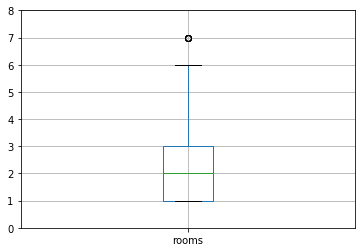

In [73]:
# Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси столбца "Число комнат"
df.boxplot('rooms')
plt.ylim(0, 8)

Text(0, 0.5, 'Количество квартир')

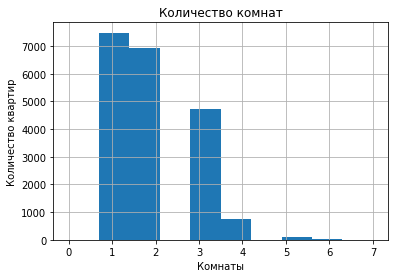

In [74]:
# Строим гистограмму для числа комнат
df['rooms'].hist(bins=10, range = (0,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')

В размах «ящике» на первом графике самые распространенные варианты на продажу, что соответствует данным с гистограммы. В основном люди продают 1- и 2-комнатные квартиры.

(0, 4)

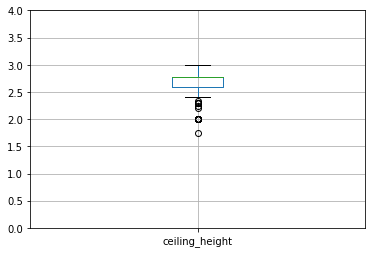

In [75]:
# Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси столбца "Высота потолков"
df.boxplot('ceiling_height')
plt.ylim(0, 4)

Text(0, 0.5, 'Количество квартир')

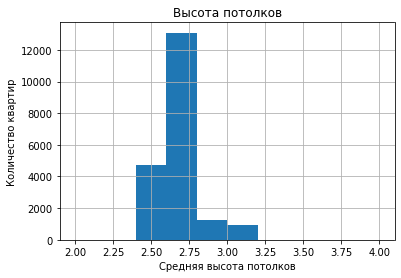

In [76]:
# Строим гистограмму для высоты потолков
df['ceiling_height'].hist(bins=10, range = (2,4))
plt.title('Высота потолков')
plt.xlabel('Средняя высота потолков')
plt.ylabel('Количество квартир')

Видим, что в основном в квартирах высота потолков от 2.3 до 3 метров

(0, 500)

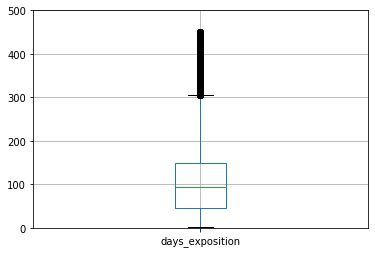

In [77]:
# Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси столбца времени,
# потраченному на продажу квартиры
df.boxplot('days_exposition')
plt.ylim(0, 500)

Text(0, 0.5, 'Количество квартир')

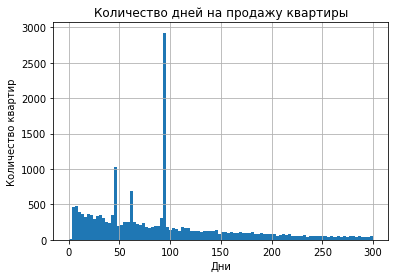

In [78]:
# Строим гистограмму для времени, потраченному на продажу квартиры
df['days_exposition'].hist(bins=100, range = (0,300))
plt.title('Количество дней на продажу квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')

При изучении графиков можно сделать вывод, что квартиры в Санкт-Петербурге и области продаются в основном от 45 до 200 дней. Но вообще, могут продаваться от 1 до 440 дней. Все, что дольше - аномальные значения, 

Рассмотрим, какие факторы больше всего влияют на стоимость квартиры.

Зависит ли цена от квадратного метра?

In [79]:
# Используем корреляцию Пирсона: чем ближе коэффициент к крайним (1;-1), тем теснее линейная взаимосвязь
df['last_price'].corr(df['total_area'])

0.704928346617295

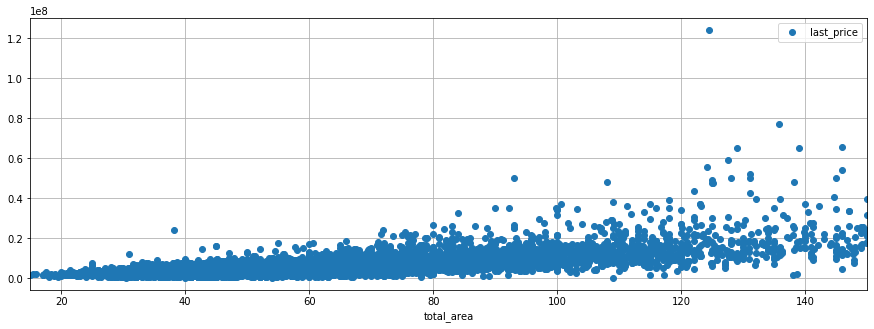

In [80]:
df.plot(x='total_area', y='last_price', grid=True, style='o', figsize=(15, 5))

Зависит ли цена от числа комнат?

In [81]:
df['last_price'].corr(df['rooms'])

0.4036628954640045

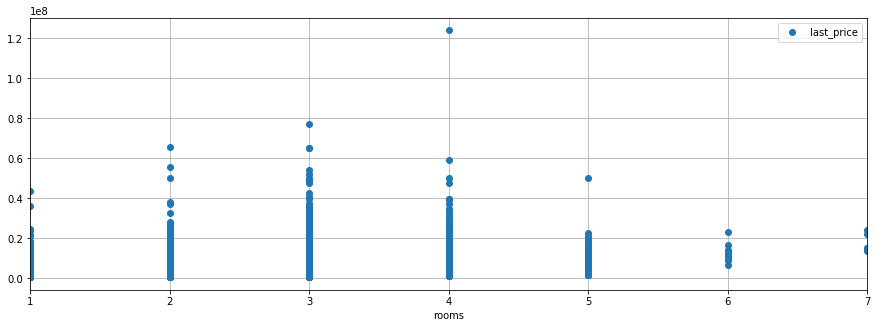

In [82]:
df.plot(x='rooms', y='last_price', grid=True, style='o', figsize=(15, 5))

Зависит ли цена от этажа?

In [83]:
df['last_price'].corr(df['floor'])

0.10200878869531825

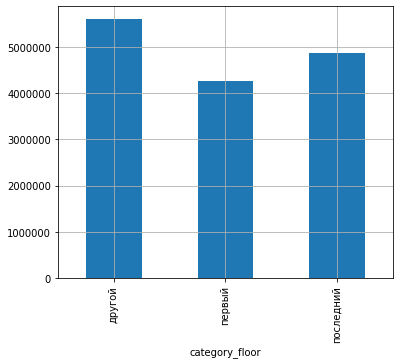

In [84]:
#Вычислим среднюю цену в каждой категории. `bar` - означает столбчатый график
mean_price = df.groupby('category_floor')['last_price'].mean();
mean_price.plot(x=mean_price.index, y=mean_price.values, kind='bar', grid=True, figsize=(6,5));



Зависит ли цена от удаленности от центра?

In [85]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.2537204400660568

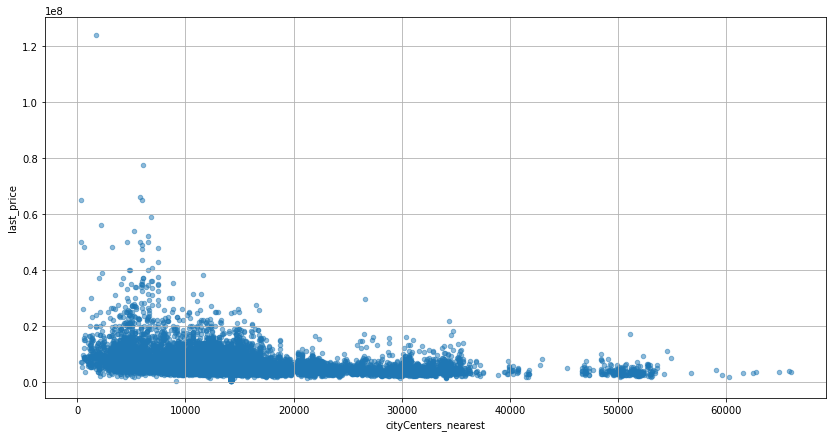

In [86]:
# alpha -  прозрачность
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)

Зависит ли цена от даты размещения?

In [87]:
df['last_price'].corr(df['day'])

-0.006833505135890027

In [88]:
df['last_price'].corr(df['month'])

0.0005578162686277714

In [89]:
df['last_price'].corr(df['year'])

0.006343498129852618

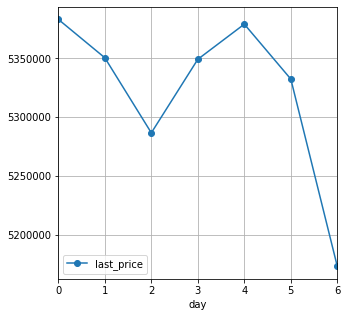

In [90]:
# Зависимость от дня размещения
(df.pivot_table(index='day', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

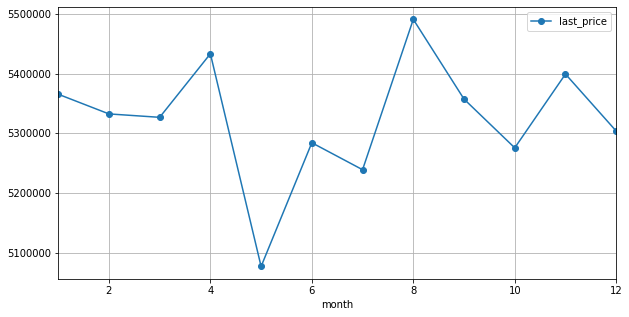

In [91]:
# Зависимость от месяца размещения
(df.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

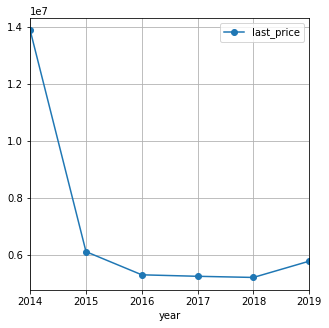

In [92]:
# Зависимость от года размещения
(df.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Выводы:
- чем выше площадь квартиры, тем выше цена;
- число комнат не сильно влияет на цену. Но видим, что чем больше комнат - тем больше цена.
Возможно, на стоимость также влияет расположение: если мало комнат, но квартира ближе к центру, то цена выше
- первый этаж значительно дешевле, чем все остальные;
- чем ближе к центру, тем выше цена. Самые дорогие квартиры на расстоянии 20000 метров (20 км) от центра;
- самая высокая цена у квартир, выставленных на продажу в субботу;
- самая высокая цена у квартиры, выставленной в декабре. Но это 7-комнатная квартира, которая вызывала сомнение.
Лучше будем считать, что самые дорогие квартиры, выставленные на продажу в апреле и сентябре;
- Начиная с 2014 по 2018 год стоимость квартир снижалась.

Выберем 10 населённых пунктов с наибольшим числом объявлений. 
Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
Выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [93]:
# Сгруппируем данные по "Названию населенного пункта" и "Стоимость квадратного метра"
# Методов `agg`  найдем количество и среднее значение. Отсортируем по убыванию
sity = df.groupby('locality_name')['price_square_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
sity.columns = ['rooms', 'price_square_meter']
sity.reset_index(inplace=True)

In [94]:
sity

,locality_name,rooms,price_square_meter
0,Санкт-Петербург,12821,110241.521851
1,поселок Мурино,512,85906.127207
2,поселок Шушары,411,78631.634990
3,Всеволожск,355,68819.983956
4,Пушкин,314,101879.458680
5,Колпино,307,75340.402084
6,поселок Парголово,306,90002.244826
7,Гатчина,273,68799.652210
8,деревня Кудрово,264,92674.384211
9,Выборг,204,57562.621463


Больше всего объявлений по продаже квартир в Санкт-Петербурге, что логично. В этом же городе средняя стоимость 
квадратного метра выше

Изучим предложения квартир: выясним, какая область входит в центр

In [95]:
# Создадим столбец "Расстояние до центра в км". Т.к. значения у нас в метрах, необходимо поделить на 1000 (1 км = 1000 м)
# Переводом в целочисленный тип мы округлим значение до целого
df['centre_km'] = df['cityCenters_nearest'] / 1000
df['centre_km'] = df['centre_km'].fillna(value=0).astype(int)

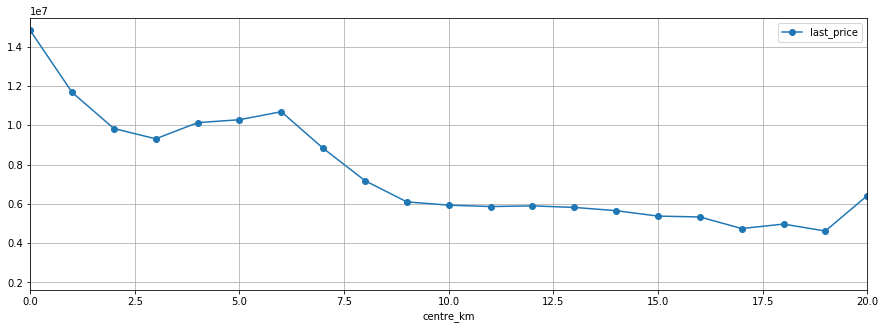

In [96]:
# Выберем город Санкт-Петербург, построим график
(df.query('locality_name == "Санкт-Петербург"').pivot_table(index='centre_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,20), figsize=(15, 5))
)
plt.show()

По данному графику видим, что в центральную часть входит радиус примерно в 7 км от центра Санкт-Петербурга. Соответственно, чем ближе к центру города, тем выше цена

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры

In [97]:
# Для среза данных воспользуемся методом `query`
df_spb_centre = df.query('(locality_name == "Санкт-Петербург") & (centre_km <= 7)') # центр города
df_spb_all = df.query('locality_name == "Санкт-Петербург"') # остальная часть города

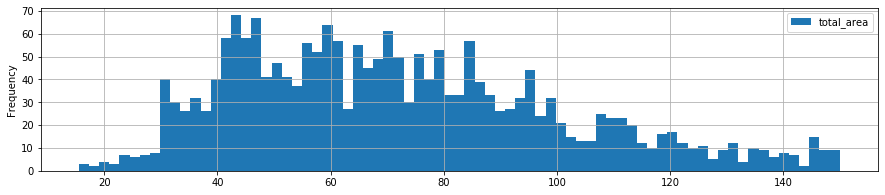

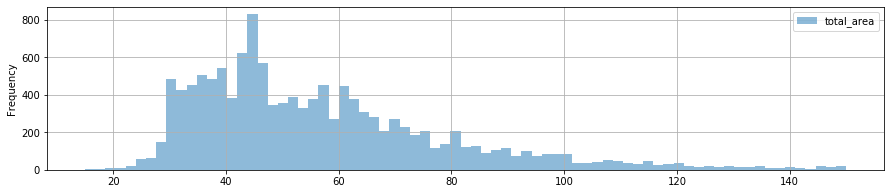

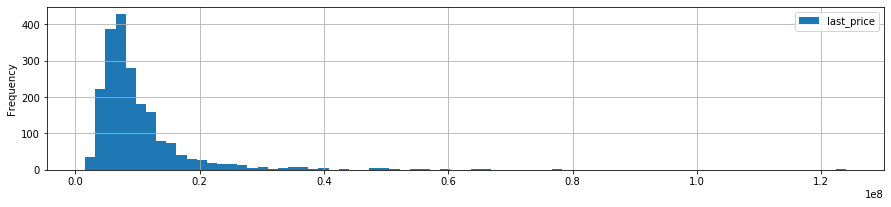

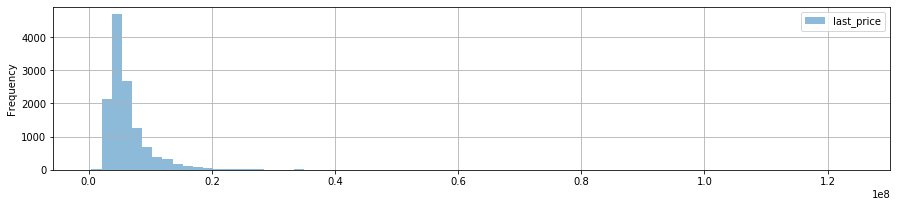

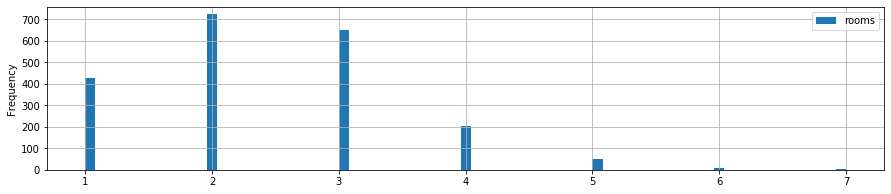

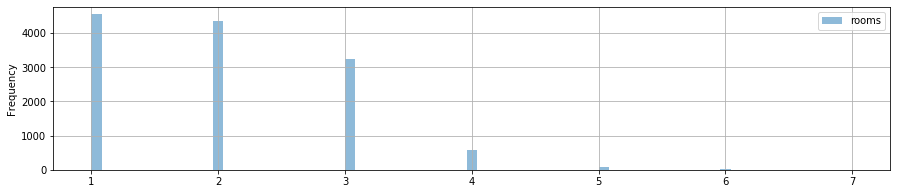

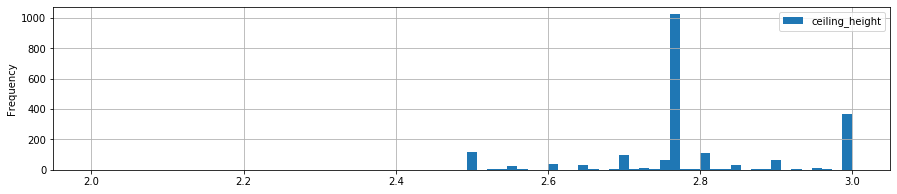

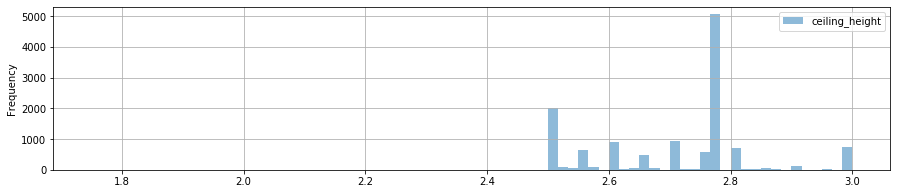

In [98]:
# Для построения графиков воспользуемся циклом
parametrs = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for index in parametrs:
    df_spb_centre.plot(y=index, kind='hist', grid=True, figsize=(15,3), bins=75, alpha=1)
    df_spb_all.plot(y=index, kind='hist', grid=True, figsize=(15,3), bins=75, alpha=0.5)
    plt.show()

По указанным графикам сделаем выводы:
- Общая площадь квартир в центральной части Санкт-Петербурга (напомним, что центр - это все что внутри радиуса 7 км)выше, по сравнению с квартирами в остальном городе;
- Цена за квадратный метр в центре выше (ось х);
- В центре в основном продают 2- и 3-комнатные квартиры (причем, 3-комнатных больше);
- Потолки в центре города и во всем городе примерно одинаковые, но видно, что в центре высота потолков разная

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

Число комнат:

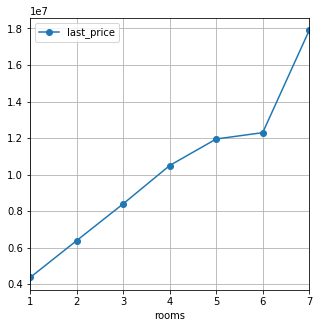

In [99]:
df_spb_all.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Как видим, чем больше комнат, тем выше цена

Этаж:

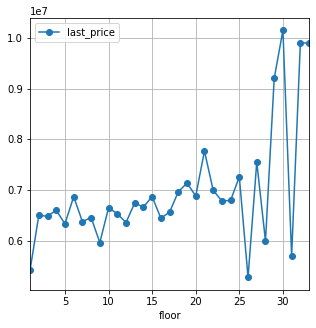

In [100]:
df_spb_all.pivot_table(index='floor', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Примерно все этажи стоят одинаково, за исключением первого

Удаленность от центра:

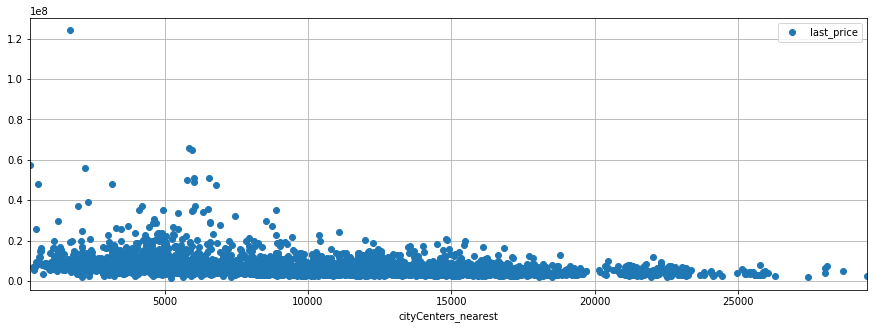

In [101]:
df_spb_all.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(15, 5))

Чем ближе к центру, тем квартиры дороже

 Дата размещения объявления:

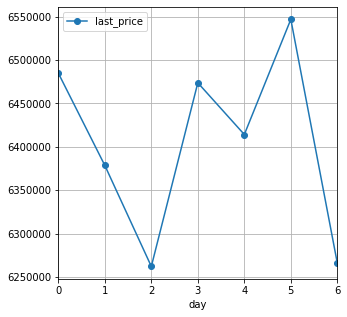

In [102]:
df_spb_all.pivot_table(index='day', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

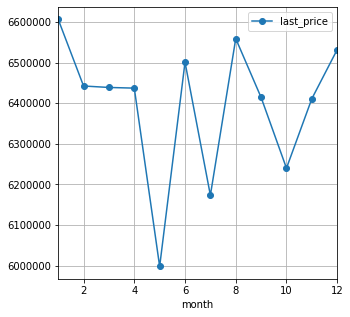

In [103]:
df_spb_all.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

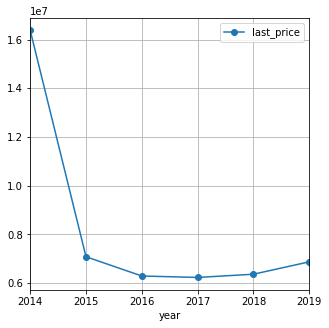

In [104]:
df_spb_all.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Самые дорогие квартиры в Санкт-Петербурге выставлялись на продажу в среду и в воскресенье; месяц - январь, сентябрь, декабрь. С каждым годом квартиры дешевеют

Вывод:
- чем больше комнат, тем выше цена;
- примерно все этажи стоят одинаково, за исключением первого;
- чем ближе к центру, тем квартиры дороже;
- самые дорогие квартиры в Санкт-Петербурге выставлялись на продажу в субботу; месяц - май. С каждым годом квартиры дешевеют

## Общий вывод

Мы исследовали данные сервиса Яндекc.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Научились определять рыночную стоимость объектов недвижимости, установили параметры. Смогли отследить аномалии и возможную мошенническую деятельность. 

В нашем исследовании можно сделать следующие общие выводы:
- самые распространненные квартиры на рынке недвижимости - это квартиры площадью 40-50 квадратных метров;
- средняя цена на квартиры в основном от 2,5 до 5 млн рублей;
- самые распространенные варианты продажи - это продажи 1- и 2-комнатных квартир;
- среднее время продажи составляет 95 дней;
- чем ближе к центру, тем выше цена;
- начиная с 2014 по 2018 год стоимость квартир снижалась, но затем опять начала расти;
- самые дешевые квартиры - это однокомнатные;
- стоимость квадратного метра дороже всего в Санкт-Петербурге - примерно 115000 руб/м2
- стоимость квадратного метра дешевле всего в Выборе (121 км от Санкт-Петербурга) - примерно 58000 руб/м2